Student Details

Name: Vipul Popat

ID: 18195121

All necessary imports are provided. Please do not add further imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

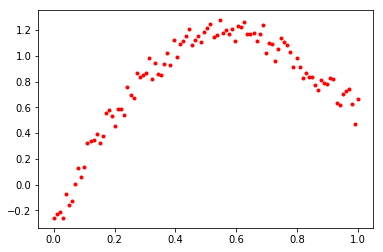

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

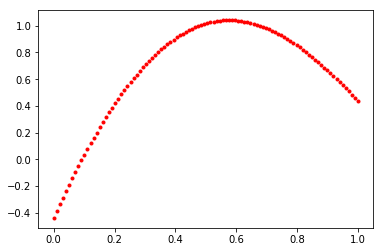

In [3]:
plt.plot(X,y_nf,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]
lambdas = np.linspace(0,1,1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


/home/vipulpopat/Tools/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Task 4.1 
Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

Text(0.5, 1.0, 'E_in, E_out for lambda between [0,1]')

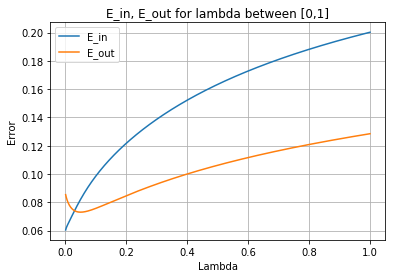

In [9]:
# plot ein, eout for lambda > 0
plt.plot(lambdas[1:],ein[1:], label='E_in')
plt.plot(lambdas[1:],eout[1:], label='E_out')

plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend(loc='best')
plt.grid(True)
plt.title("E_in, E_out for lambda between [0,1]")


Looks like E_in and E_out are the smallest for the smallest value of lambda. The E_in and E_out curves also cross each other whih results in E_out being less than than E_in before the cross happens

In [10]:
Eout_min_index = np.argmin(eout)
candidate_lambda = lambdas[Eout_min_index]

print("Lowest index of E_out is {} and candidate_lambda is {}".format(Eout_min_index, candidate_lambda));
print("E_out with regularization is {} and without is {}".format(eout[0], eout[Eout_min_index]));
print("Difference in E_out :", eout[0] - eout[Eout_min_index])

Lowest index of E_out is 50 and candidate_lambda is 0.050050050050050046
E_out with regularization is 0.6890927234891632 and without is 0.07300492934851112
Difference in E_out : 0.6160877941406521


# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

In [11]:
# if I didnt use the predictive algorithm used by Michel Danjou and if I used the one given above i.e. def lin_reg(w,X):
# I was getting wierd plots 
def calc_polynom(weights, X):
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

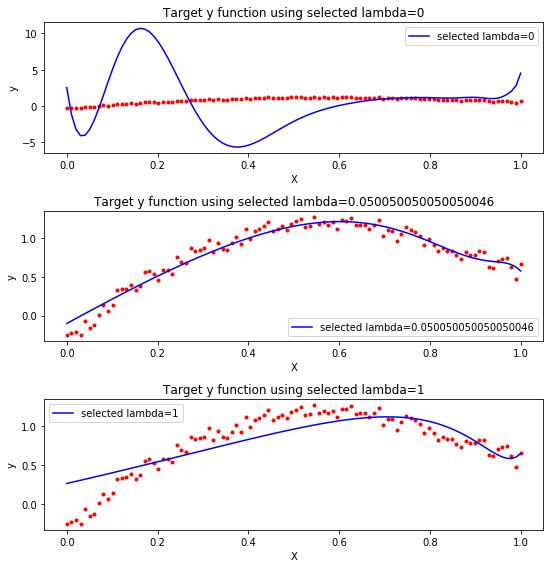

In [12]:
def experiment(order, l):
    X_order = transPoly(X,order)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, train_size=0.9, random_state = 9)

    weights = weights_reg(X_train,y_train,l)
    e_in = calc_error(weights, X_train,y_train)
    e_out = calc_error(weights, X_test,y_test)
    
    return e_in, e_out, weights

fig = plt.figure(figsize=(8, 8)) 
    
ls = [0, candidate_lambda, 1]
for i in range(1,4):

    plt.subplot(3,1,i)
    e_in, e_out, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('X')
    plt.ylabel('y')
    lbl = 'selected lambda=' + str(ls[i-1])
    plt.title('Target y function using ' + lbl)
    plt.plot(X, pred  , 'b', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



# Task 5
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. 
  * Note that the data set provided is ordered by increasing X.

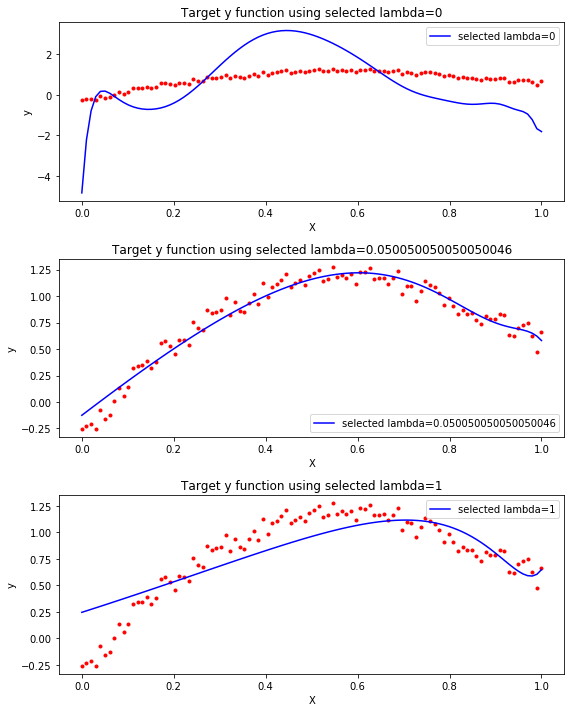

In [13]:
def experiment(order, l):
    X_order = transPoly(X,order)
    ein=[]
    eout=[]
    weights=[]
    
    kf = KFold(n_splits=10)

    for train_index, test_index in kf.split(X_order):
        X_train, X_test = X_order[train_index], X_order[test_index]
        y_train, y_test = y[train_index], y[test_index]

        w = weights_reg(X_train,y_train,l)
        weights.append(w)
        ein.append(calc_error(w,X_train,y_train))
        eout.append(calc_error(w,X_test,y_test))
    
    # Validation. Find the lowest Eout and best lambda
    eout_min_index = np.argmin(eout)
    selected_lambda = lambdas[eout_min_index]

    return ein[eout_min_index], eout[eout_min_index], weights[eout_min_index]

plt.figure(figsize=(8, 10)) 
    
ls = [0, candidate_lambda, 1]
for i in range(1,4):

    plt.subplot(3,1,i)
    e_in, e_out, weights = experiment(50, ls[i-1])
    pred = calc_polynom(weights, X)
        
    plt.plot(X,y,'r.')
    plt.xlabel('X')
    plt.ylabel('y')
    lbl = 'selected lambda=' + str(ls[i-1])
    plt.title('Target y function using ' + lbl)
    plt.plot(X, pred  , 'b', label=lbl)
    plt.legend(loc='best')
    plt.tight_layout()

plt.show()



# Task 6 (CE6002)
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).

Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

**TODO**